# Clase 3
Aplicaremos métodos de clustering para tratar de analizar un conjunto de respuestas a una encuesta política, que consiste en 26 afirmaciones en que el encuestado responde con un puntaje de 1 a 5, donde 1 expresa desacuerdo con la afirmacion y 5 muy de acuerdo. Los datos fueron recabados en 2019 por parte de [a quien voto](https://github.com/johnblanco/predictor_electoral).

-------
La siguiente celda descarga el dataset desde EVA y lo descomprime.

**Nota: solo corre en linux, si estan en otro sistema ooperativo, descarguen el archivo a mano y ponganlo en la carpeta donde tienen el notebook**.

In [ ]:
! wget -O data-a-quien-voto.zip https://eva.fing.edu.uy/pluginfile.php/255716/mod_folder/content/0/data-a-quien-voto.zip?forcedownload=1
! unzip data-a-quien-voto.zip

--2023-08-30 05:10:39--  https://eva.fing.edu.uy/pluginfile.php/255716/mod_folder/content/0/data-a-quien-voto.zip?forcedownload=1
Resolving eva.fing.edu.uy (eva.fing.edu.uy)... 164.73.32.9
Connecting to eva.fing.edu.uy (eva.fing.edu.uy)|164.73.32.9|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 787823 (769K) [application/zip]
Saving to: ‘data-a-quien-voto.zip’

data-a-quien-voto.z  30%[=====>              ] 231.98K   416KB/s               ^C
Archive:  data-a-quien-voto.zip
  End-of-central-directory signature not found.  Either this file is not
  a zipfile, or it constitutes one disk of a multi-part archive.  In the
  latter case the central directory and zipfile comment will be found on
  the last disk(s) of this archive.
unzip:  cannot find zipfile directory in one of data-a-quien-voto.zip or
        data-a-quien-voto.zip.zip, and cannot find data-a-quien-voto.zip.ZIP, period.


In [ ]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Carga de datos
Los datos vienen en un archivo CSV. Ya incluimos la carga del archivo y otros datos de referencia.

In [ ]:
msj = """No se encontró data.csv, asegurate haberlo descargado
"y descomprimirlo  en la carpeta correcta"""
assert os.path.isfile('data.csv'), msj

# Importamos los datos utilizando pandas
datos = pd.read_csv("data.csv")

# Creo la tabla de candidatos a mano
candidatos = pd.DataFrame(
    [
        [1,'Oscar Andrade', 'Frente Amplio'],
        [2,'Mario Bergara', 'Frente Amplio'],
        [3,'Carolina Cosse', 'Frente Amplio'],
        [4,'Daniel Martínez', 'Frente Amplio'],
        [5,'Verónica Alonso', 'Partido Nacional'],
        [6,'Enrique Antía', 'Partido Nacional'],
        [8,'Carlos Iafigliola', 'Partido Nacional'],
        [9,'Luis Lacalle Pou', 'Partido Nacional'],
        [10,'Jorge Larrañaga', 'Partido Nacional'],
        [11,'Juan Sartori', 'Partido Nacional'],
        [12,'José Amorín', 'Partido Colorado'],
        [13,'Pedro Etchegaray', 'Partido Colorado'],
        [14,'Edgardo Martínez', 'Partido Colorado'],
        [15,'Héctor Rovira', 'Partido Colorado'],
        [16,'Julio María Sanguinetti', 'Partido Colorado'],
        [17,'Ernesto Talvi', 'Partido Colorado'],
        [18,'Pablo Mieres', 'La Alternativa'],
        [19,'Gonzalo Abella', 'Unidad Popular'],
        [20,'Edgardo Novick', 'Partido de la Gente'],
        [21,'César Vega', 'PERI'],
        [22,'Rafael Fernández', 'Partido de los Trabajadores'],
        [23,'Justin Graside', 'Partido Digital'],
        [24,'Gustavo Salle', 'Partido Verde'],
        [25,'Carlos Techera', 'Partido de Todos']
    ],
    columns=['candidatoId','name','party'],
)

datos=datos.merge(candidatos,on=['candidatoId'])

# Sólo por si necesita, cargamos un diccionario con el texto de cada pregunta
preguntas={
    '1': 'Controlar la inflación es más importante que controlar el desempleo. ',
    '2': 'Hay que reducir la cantidad de funcionarios públicos',
    '3': 'Deberia aumentar la carga de impuestos para los ricos.',
    '4': 'El gobierno no debe proteger la industria nacional, si las fábricas no son competitivas esta bien que desaparezcan.',
    '5': 'La ley de inclusión financiera es positiva para la sociedad. ',
    '6': 'Algunos sindicatos tienen demasiado poder. ',
    '7': 'Cuanto más libre es el mercado, más libre es la gente. ',
    '8': 'El campo es y debe ser el motor productivo de Uruguay. ',
    '9': 'La inversión extranjera es vital para que Uruguay alcance el desarrollo. ',
    '10': 'Los supermercados abusan del pueblo con sus precios excesivos. ',
    '11': 'Con la vigilancia gubernamental (escuchas telefonicas, e-mails y camaras de seguridad) el que no tiene nada que esconder, no tiene de que preocuparse. ',
    '12': 'La pena de muerte debería ser una opción para los crímenes mas serios. ',
    '13': 'Uruguay debería aprobar más leyes anti corrupción y ser más duro con los culpables. ',
    '14': 'Las FF.AA. deberían tener un rol activo en la seguridad pública. ',
    '15': 'Las carceles deberían ser administradas por organizaciones privadas. ',
    '16': 'Hay que aumentar el salario de los policias significativamente. ',
    '17': 'Para los delitos más graves hay que bajar la edad de imputabilidad a 16 años. ',
    '18': 'Uruguay no necesita un ejército. ',
    '19': 'Uruguay es demasiado generoso con los inmigrantes. ',
    '20': 'La ley trans fue un error. ',
    '21': 'El feminismo moderno no busca la igualdad sino el poder. ',
    '22': 'Para la ley no deberia diferenciarse homicidio de femicidio. ',
    '23': 'La separación de estado y religión me parece importante. ',
    '24': 'La legalización de la marihuana fue un error. ',
    '25': 'La legalización del aborto fue un error. ',
    '26': 'El foco del próximo gobierno debe ser mejorar la educación pública. '
}

# Ordeno los datos por partido y luego por candidato

datos = datos.sort_values(by=['party','name'])

Cada fila es la respuesta de una persona, contiene un id único, el candidato que eligió, las repuestas a las 26 preguntas y la fecha. Además le agregamos el nombre del candidato y el partido al que pertenece.

Imprimimos algunos datos de prueba para asegurarnos de que quedaron bien cargados.

In [ ]:
datos.head()

id  candidatoId  1  2  3  4  5  6  7  8  ...  20  21  22  23  24  25  \
21387  38            3  4  4  3  4  5  5  3  2  ...   1   1   1   5   1   1   
21388  39            3  3  4  5  2  4  4  2  2  ...   1   1   2   5   1   1   
21389  41            3  2  3  4  2  4  4  2  2  ...   1   2   2   5   1   1   
21390  42            3  4  4  3  4  4  4  3  3  ...   3   3   2   5   2   2   
21391  44            3  4  5  3  3  4  5  5  4  ...   2   4   4   5   2   1   

       26                       fecha            name          party  
21387   5  2019-02-06T16:52:06.318997  Carolina Cosse  Frente Amplio  
21388   3  2019-02-06T17:00:09.220160  Carolina Cosse  Frente Amplio  
21389   4  2019-02-06T17:14:33.621159  Carolina Cosse  Frente Amplio  
21390   4  2019-02-06T17:44:43.482259  Carolina Cosse  Frente Amplio  
21391   5  2019-02-06T18:30:28.400279  Carolina Cosse  Frente Amplio  

[5 rows x 31 columns]

El siguiente codigo lo vamos a utilizar para graficar la cantidad de votantes auto-declarados por partido:

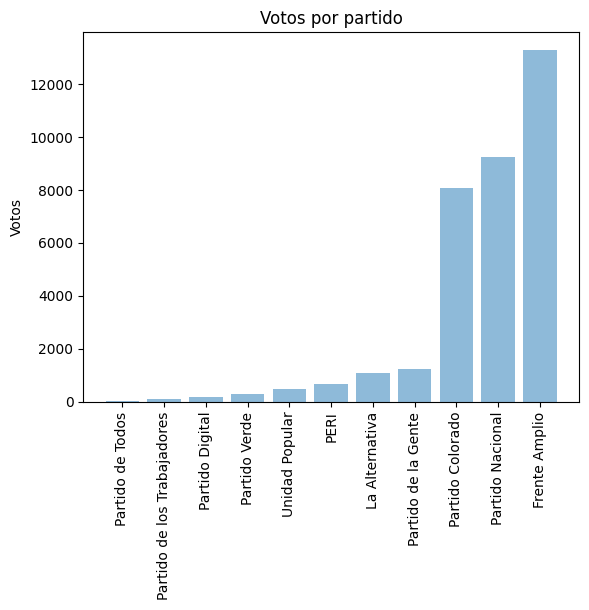

In [ ]:
unq, cnt = np.unique(datos['party'], return_counts=True)
idx = np.argsort(cnt)

plt.bar(unq[idx], cnt[idx], align='center', alpha=0.5)
plt.ylabel('Votos')
plt.title('Votos por partido')
plt.xticks(rotation=90);

En la siguiente celda, vamos a obtener los siguientes conjuntos de datos, como numpy arrays:
- Un conjunto con datos de todos los votantes
- Un conjunto análogo al anterior, pero solo con los del Frente Amplio
- Un conjunto análogo al anterior, pero solo con los del Partido Nacional
- Un conjunto análogo al anterior, pero solo con los del Partido Colorado

In [ ]:
votos = datos[[str(x) for x in np.arange(1,27)]].values
votos_fa = datos[datos['party']=='Frente Amplio'][[str(x) for x in np.arange(1,27)]].values
votos_pn = datos[datos['party']=='Partido Nacional'][[str(x) for x in np.arange(1,27)]].values
votos_pc = datos[datos['party']=='Partido Colorado'][[str(x) for x in np.arange(1,27)]].values

# PCA
Utilizaremos la técnica de PCA para poder visualizar mejor los datos y luego los resultados del clustering.

El siguiente código creará una transformación a dos dimensiones de los datos y definirá el método plot_pca_data() para visualizar los votos en dos dimensiones. El método toma como entrada una lista de pares (datos,color), lo que permitirá visualizar diferentes resultados en el mismo gráfico.

Uso: _plot_pca_data([(conjunto1,color1), (conjunto2,color2), ...])_

Donde _color_ puede ser 'r', 'g', 'b', 'y', 'k', etc.

Opcionalmente, podemos indicar un conjunto de centroides a dibujar: _plot_pca_data([(conjunto1,color1), (conjunto2,color2), ...], centroides)_

In [ ]:
from sklearn.decomposition import PCA
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler


def plot_pca_data(data_list=[],centroids=None):
    """
    Esta funcion permite transformar los datos a dos dimensiones utilizando
    PCA y mostrarlos graficamente con el color indicado.
    data_list: lista de pares (votos, color), donde votos es un numpy array
        de forma (n_votos, n_features), y color es un string que
        identifica un color valido en matplotlib
    centroids: opcional, numpy array de la forma (n_votos, features) donde
        cada uno de los n_votos es un centroide
    """
    # Esta base es la que se usa para generar los graficos en 2d
    # Como tarea pueden probar usar sklearn.manifold.TSNE que genera mejores
    # visualizaciones, pero es bastante mas lento.
    data = np.row_stack([d[0] for d in data_list])
    pca = make_pipeline(StandardScaler(), PCA(n_components=2, whiten=True)).fit(data)

    # El codigo que sigue se usa para graficar
    plt.figure(figsize=(15,10))
    x_min,x_max,y_min,y_max = np.inf,-np.inf,np.inf,-np.inf

    for data,color in data_list:
        # Pasamos los datos a 2d
        reduced = pca.transform(data)
        x_min = min(x_min,reduced[:, 0].min() - 1)
        x_max = max(x_max,reduced[:, 0].max() + 1)
        y_min = min(y_min,reduced[:, 1].min() - 1)
        y_max = max(y_max,reduced[:, 1].max() + 1)
        plt.scatter(reduced[:, 0], reduced[:, 1], color=color, alpha=.3, s=4)

    if centroids is not None:
        r_centroids = pca.transform(centroids)
        plt.scatter(r_centroids[:,0], r_centroids[:,1], marker='*', s=169, linewidths=3, color='lime', zorder=10)

    plt.xlim(x_min, x_max)
    plt.ylim(y_min, y_max)
    plt.show()

**IMPLEMENTAR:** Dibuje un gráfico de todos los votos.

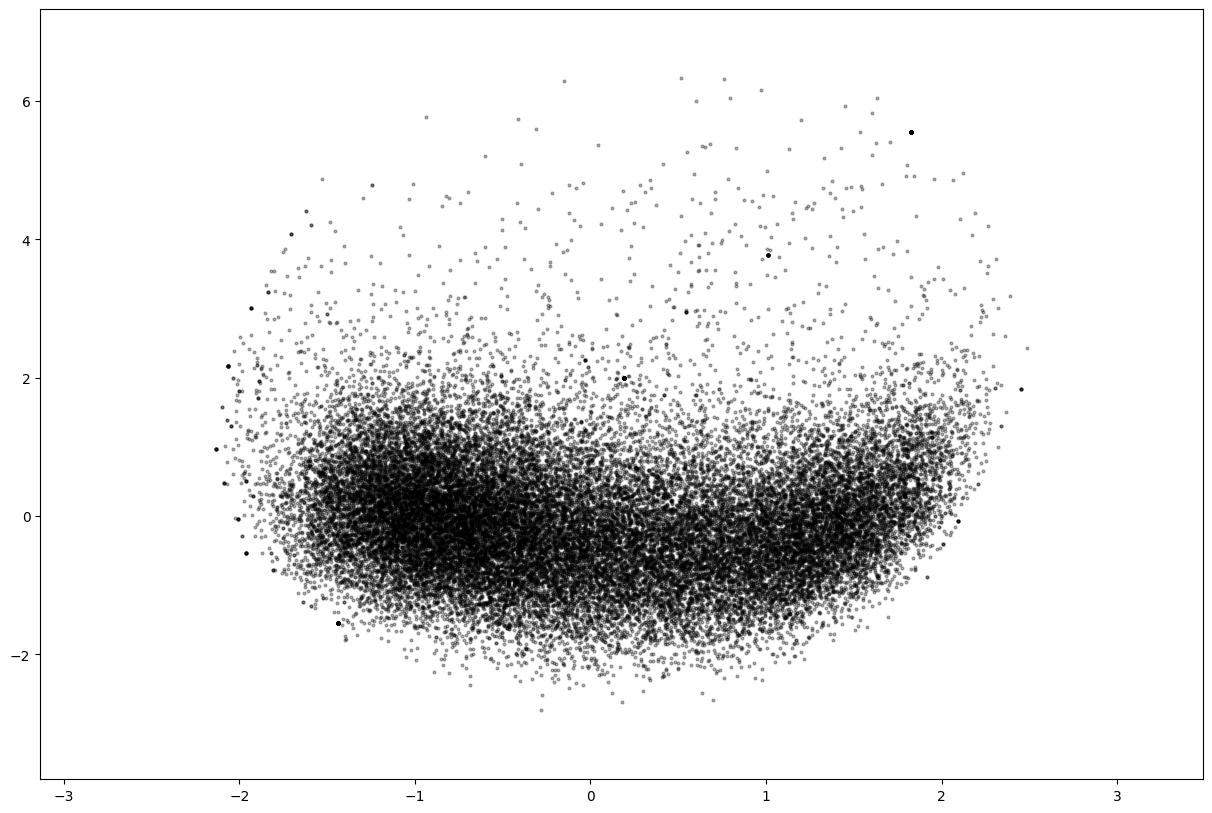

In [ ]:
# === Su código empieza acá ===

# === Su código termina acá ===

**IMPLEMENTAR:** Dibuje un gráfico de los votos del Frente Amplio, Partido Nacional y Partido Colorado con diferentes colores para poder visualizarlos mejor.

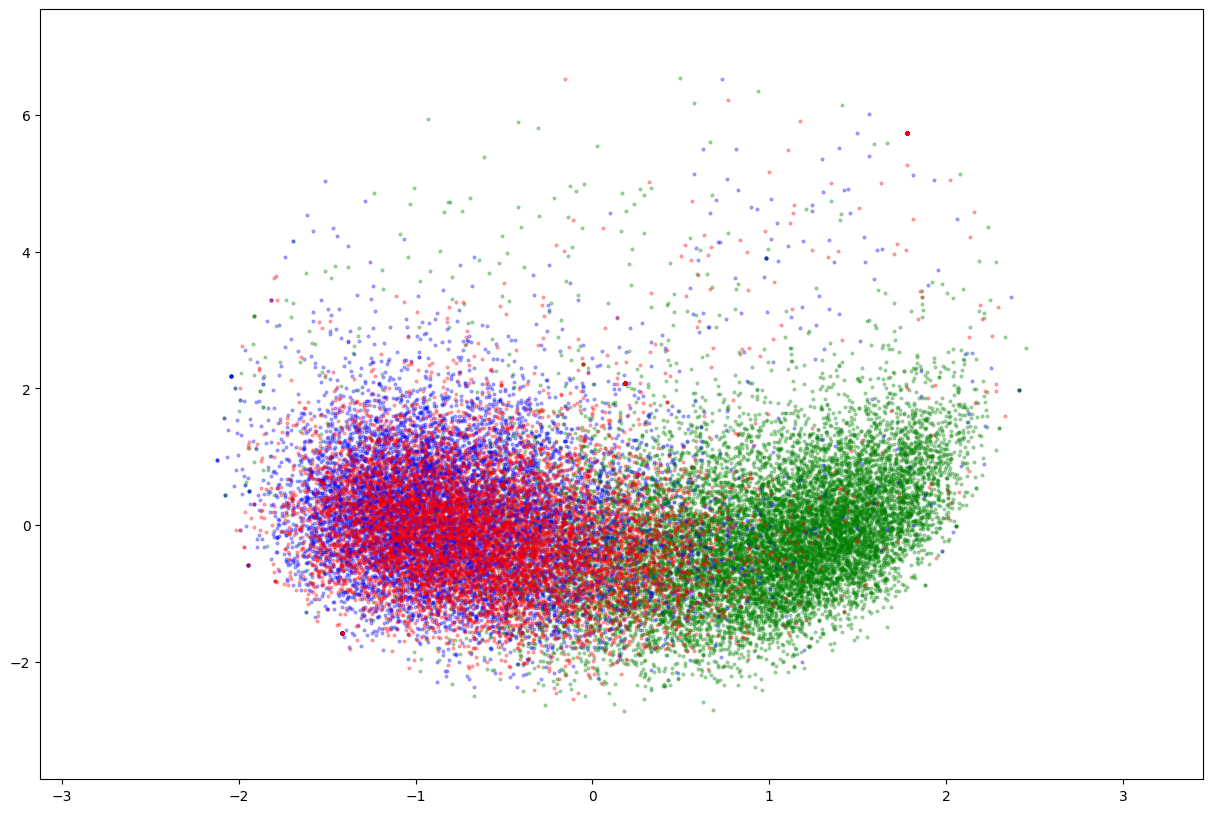

In [ ]:
# === Su código empieza acá ===

# === Su código termina acá ===

# Clustering

Aplicaremos el algoritmo de K-means para clusterizar todas las respuestas.

Comencemos por entrenar dos modelos con 10 clusters cada uno, pero distintas cantidades de inicializaciones (`n_init`): uno con `n_init=1` y el otro con `n_init=20`. Mostrar en cada caso el SSE (`inertia_`)

**Pregunta**
Que se observa?

In [1]:
from sklearn.cluster import KMeans
# === Su código empieza acá ===

# === Su código termina acá ===

A continuacion, intentaremos encontrar la mejor cantidad de clusters K para este conjunto.

**IMPLEMENTAR:** Realice el clustering de K-means para diferentes valores de K y grafique el costo de cada clustering (inertia).

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

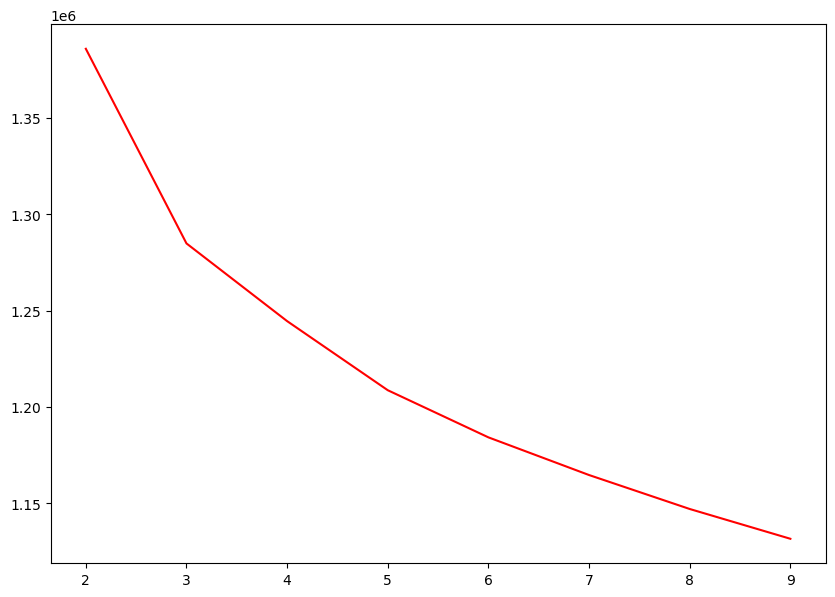

In [ ]:
from sklearn.cluster import KMeans

n_clusters = []
inertias = []

for k in range(2,10):
    # === Su código empieza acá ===

    inrt =   # type: float
    # === Su código termina acá ===
    n_clusters.append(k)
    inertias.append(inrt)

plt.figure(figsize=(10,7))
plt.plot(n_clusters, inertias,'r-',markersize=1)
plt.show()

**IMPLEMENTAR:** Otra técnica que puede servir es medir el coeficiente de silueta. Realice el clustering de K-means para diferentes valores de K y grafique el coeficiente de silueta para cada uno.

In [ ]:
from sklearn.metrics import silhouette_score

n_clusters = []
silhouettes = []

for k in range(2,10):
    # === Su código empieza acá ===


    s =   # type: float silhouette score
    # === Su código termina acá ===
    n_clusters.append(k)
    silhouettes.append(s)

plt.figure(figsize=(10,7))
plt.plot(n_clusters, silhouettes,'g-',markersize=1)
plt.show()

**PREGUNTA**

A partir de los experimento anteriores, qué valor de k parece más adecuado? **Justifique**.

**IMPLEMENTAR** Realice el clustering con K-means para el valor de k encontrado, imprima SSE y coeficiente de silueta y grafique los resultados en dos colores junto con sus centroides.

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


SSE:1.4e+06
Silhouette coefficient:0.23


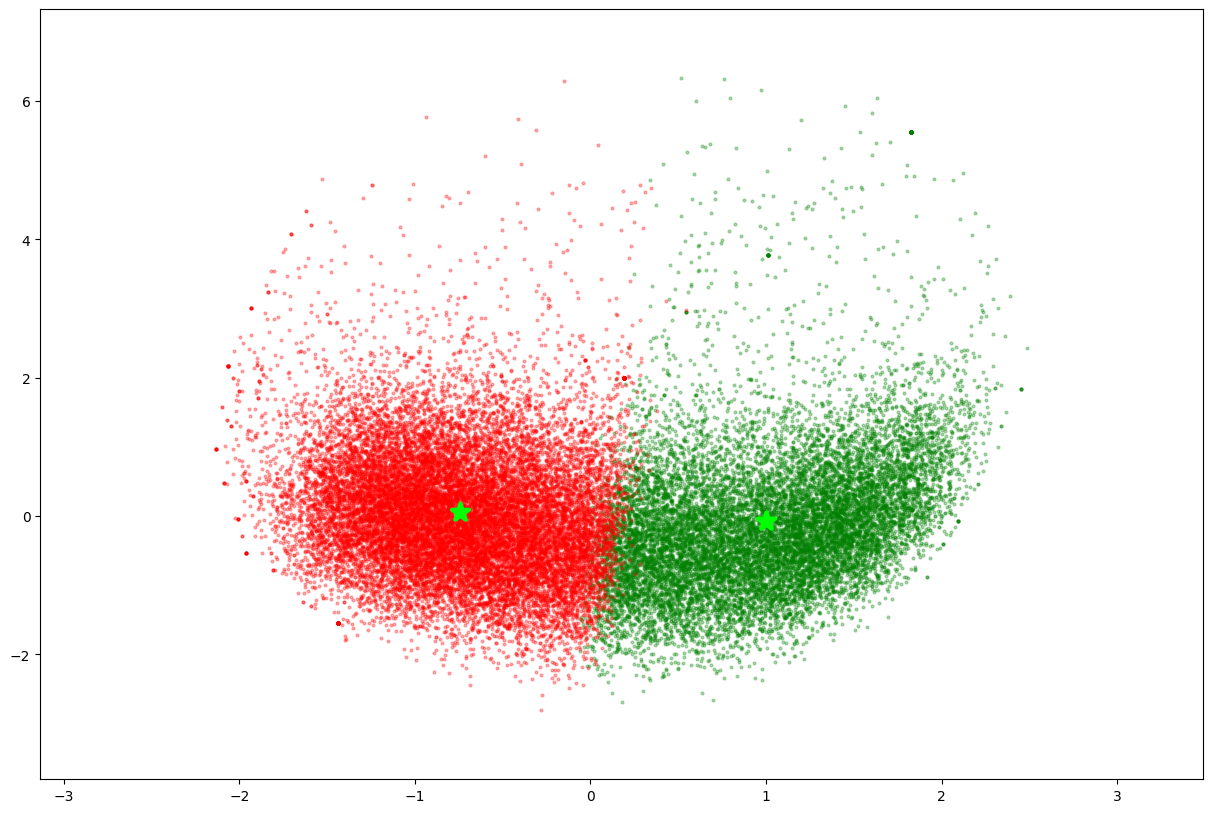

In [ ]:
# === Su código empieza acá ===

# === Su código termina acá ===

# Análisis supervisado
Hasta el momento no tuvimos en cuenta las etiquetas, pero podemos utilizar las etiquetas para tener una idea si los clusters encontrados se parecen a conjuntos conocidos.

Vamos a quedarnos unicamente con los votos para los tres partidos mayoritarios, y sus respectivas etiquetas:

In [ ]:
votos_tres = np.row_stack([votos_fa,votos_pn,votos_pc])
etiquetas_tres = np.concatenate([
    np.full(len(votos_fa), 0), # FA -> 0
    np.full(len(votos_pc), 1), # PN -> 1
    np.full(len(votos_pn), 2), # PC -> 2
])
print(votos_tres.shape)
print(etiquetas_tres.shape)

(30631, 26)
(30631,)


Dado que sabemos que hay tres grupos de votantes bien diferentes (FA, PN y PC), queremos ver si, utilizando k-means, podemos construir tres clusters que los contenga.


**IMPLEMENTAR:**
Entrenar un k-means con los votantes de estos tres partidos y tres clusters.

Imprimir los valores de SSE y coeficiente de silueta.

Utilizando el conjunto de etiquetas esperadas, imprima los valores de Índice de Rand Ajustado, Homogeneidad, Completitud y medida V.

In [ ]:
from sklearn.metrics import adjusted_rand_score, homogeneity_score, completeness_score, v_measure_score

# === Su código empieza acá ===


# === Su código termina acá ===

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


SSE:1.2e+06
Silhouette coefficient:0.24
Adjusted rand score:0.38
Homogeneity score:0.3 
Completeness score: 0.46 
v score: 0.36 


**IMPLEMENTAR:** Mostrar un reporte de clasificacion con las etiquetas devueltas por el clustering y las etiquetas esperadas. ¿Qué problema puede tener esta matriz? Como se puede solucionar?

**Opcional** Implemente su propuesta de solucion


In [ ]:
from sklearn.metrics import classification_report
# === Su código empieza acá ===

# === Su código termina acá ===

              precision    recall  f1-score   support

           0       0.86      0.86      0.86     13288
           1       0.43      0.93      0.59      8082
           2       0.00      0.00      0.00      9261

    accuracy                           0.62     30631
   macro avg       0.43      0.60      0.48     30631
weighted avg       0.49      0.62      0.53     30631



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Para terminar, vamos a calcular la respuesta promedio de cada uno de los votantes por partido, y ver en cual de los tres clusters queda asignado.

In [ ]:
# === Su código empieza acá ===

# === Su código termina acá ===

# DBSCAN
Por ultimo, vamos a utilizar DBSCAN para generar clusters, utilizando `eps = 0.15`, solamente para los votos de los tres partidos mayoritarios (`votos_tres`).

Contar la cantidad de clusters generados y reportar el coheficiente de silueta. Utilizando el conjunto de etiquetas esperadas, imprima los valores de Índice de Rand Ajustado, Homogeneidad, Completitud y medida V.

In [ ]:
from sklearn.cluster import DBSCAN
# === Su código empieza acá ===

# === Su código termina acá ===

In [ ]:
# === Su código empieza acá ===
# === Su código termina acá ===

Silhouette coefficient:-0.26
Adjusted rand score:0.00015
Homogeneity score:0.00033 
Completeness score: 0.006 
v score: 0.00063 


Mostrar la cantidad de instancias que no tienen un cluster asignado.

**PREGUNTA**: Qué problema se puede observar? Probar otros valores de `eps` y `min_samples` que mitiguen esta problemática. Justifique su elección de parámetros explicando qué cambio propone y por qué funciona (Ejemplo: _aumentar/disminuir `eps` porque eso hace que.... aumentar/disminuir `min_samples` porque entonces..._).

Pueden chequear:
- [sklearn.cluster.DBSCAN](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.DBSCAN.html)
- [User Guide: DBSCAN](https://scikit-learn.org/stable/modules/clustering.html#dbscan)


In [ ]:
# === Su código empieza acá ===
# === Su código termina acá ===

Por ultimo, y solo por curiosidad, vamos a visualizar los clusters generados mediante DBSCAN:

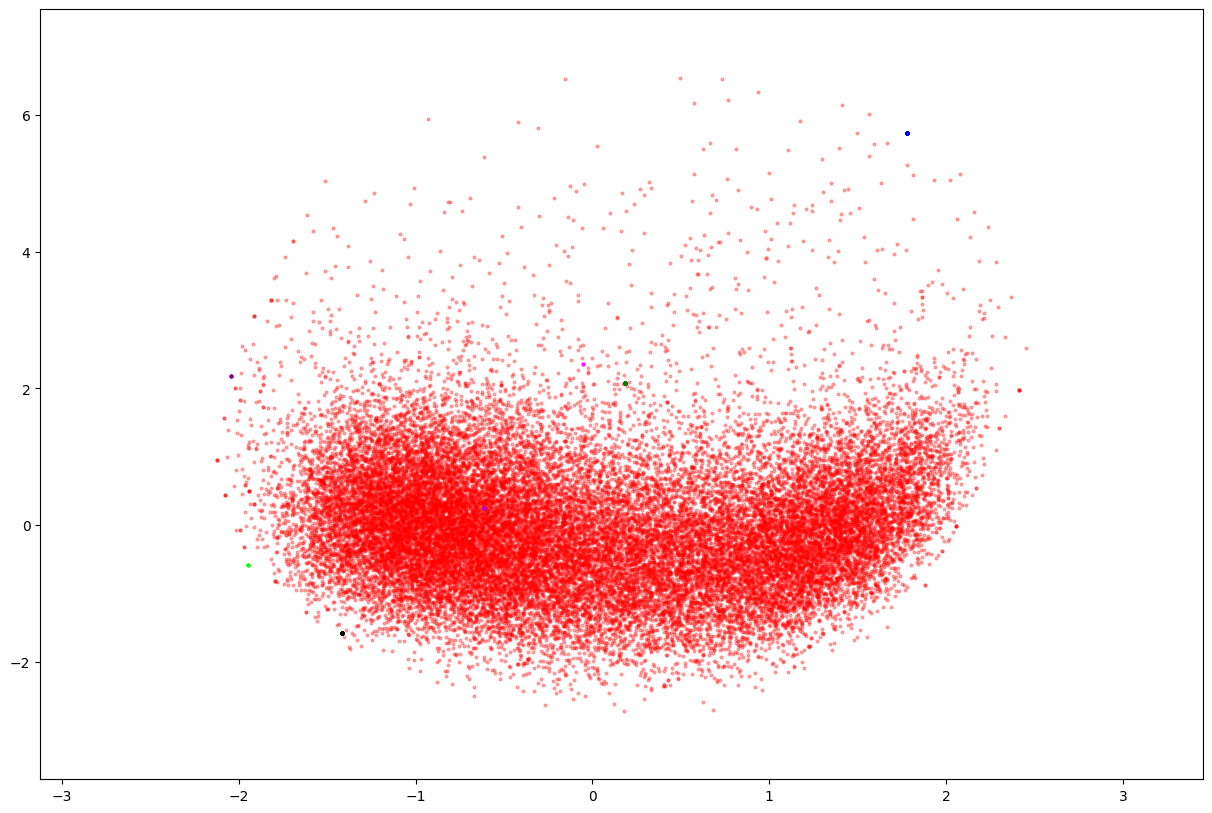

In [ ]:
colores = ['r', 'g', 'b', 'k', 'm','tomato', 'fuchsia', 'purple','lime', 'navy', 'deeppink', 'gray', 'orange']
plot_pca_data([(votos_tres[tres_pred==u],colores[i]) for i, u in enumerate(np.unique(tres_pred))])